In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.interpolate import interp1d

SPLINE INTERPOLATION

In [1]:
# Read the data
sales_data_spline = pd.read_excel("fake_data_m5.xlsx")

# Replace 0 sales with NaN
sales_data_spline.loc[sales_data_spline['Sales'] == 0, 'Sales'] = pd.NA


NameError: name 'pd' is not defined

In [5]:
# Convert Sales column to numeric if it's not already
sales_data_spline['Sales'] = pd.to_numeric(sales_data_spline['Sales'], errors='coerce')

# Use linear interpolation to fill in the missing values
sales_data_spline['Sales'] = sales_data_spline['Sales'].interpolate(method='spline', order=3)

# Round the sales data
sales_data_spline['Sales'] = sales_data_spline['Sales'].round()

# Convert Date column to Month-Year format
sales_data_spline['MonthYear'] = sales_data_spline['Date'].dt.strftime('%b-%Y')

# Group by MonthYear and calculate total sales
monthly_sales = sales_data_spline.groupby('MonthYear').agg({'Date': 'min', 'Sales': 'sum'}).reset_index()
monthly_sales['Date'] = pd.to_datetime(monthly_sales['Date'])

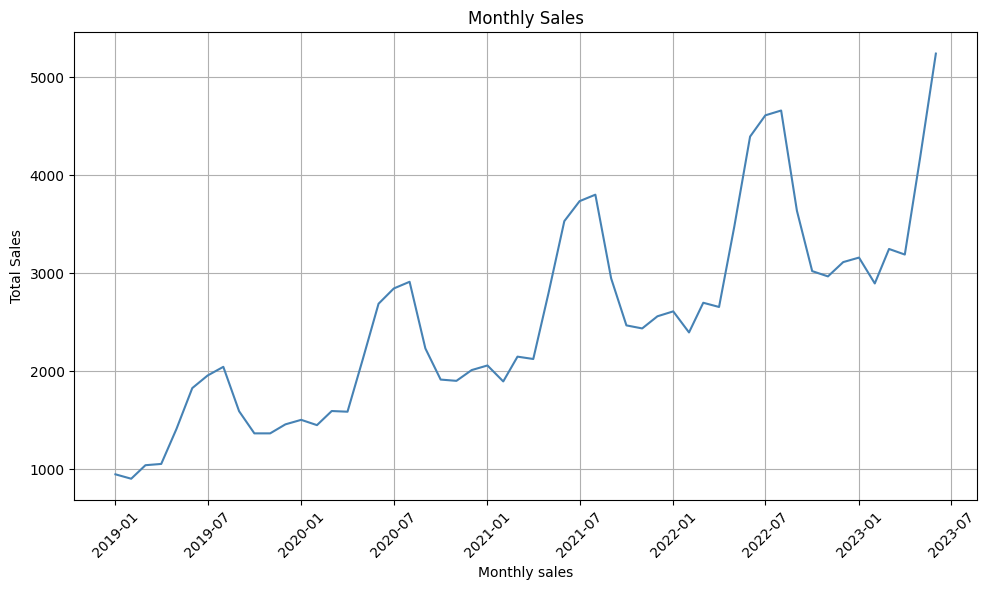

In [6]:
# Plot the graph
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Sales', data=monthly_sales, color='steelblue')
plt.title('Monthly Sales')
plt.xlabel('Monthly sales')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

POLYNOMIAL INTERPOLATION

In [7]:
import numpy as np
import statsmodels.api as sm
from statsmodels.api import OLS
from statsmodels.formula.api import ols

In [8]:
#Read the data
sales_data_polynomial = pd.read_excel("fake_data_m5.xlsx")

#Replace zeros with NaN
sales_data_polynomial.loc[sales_data_polynomial['Sales'] == 0, 'Sales'] = pd.NA

#Create a new column 'Days' which will be used for the interpolation
sales_data_polynomial['Days'] = np.arange(1, len(sales_data_polynomial) + 1)

#Initialize variables to store the results
best_degree = 0
best_aic = np.inf

# Try different degrees of the polynomial
for degree in range(1, 28):
    #Extract values
    x = sales_data_polynomial.loc[~sales_data_polynomial['Sales'].isna(), 'Days'].values
    y = sales_data_polynomial.loc[~sales_data_polynomial['Sales'].isna(), 'Sales'].values

    # Fit the model
    coeffs = np.polyfit(x, y, degree)
    
    #Generate the interpolated values
    interpolated_sales = np.polyval(coeffs, x)
    
    # Round interpolated values
    interpolated_sales = np.round(interpolated_sales)
  
    residuals = y - interpolated_sales
    
    # Calculate the AIC
    aic = len(sales_data_polynomial) * np.log(np.mean(residuals**2)) + 2 * (degree + 1)
    
    if aic < best_aic:
        best_degree = degree
        best_aic = aic

print("Best Degree:", best_degree)
print("Best AIC:", best_aic)

# Use the best degree to perform polynomial interpolation
coeffs = np.polyfit(x, y, best_degree)

# Generate the interpolated values for the entire dataset
interpolated_sales = np.polyval(coeffs, sales_data_polynomial['Days'])

# Fill NaN values with interpolated values
sales_data_polynomial.loc[sales_data_polynomial['Sales'].isna(), 'Sales'] = np.round(interpolated_sales[sales_data_polynomial['Sales'].isna()])

sales_data_polynomial = sales_data_polynomial.drop(columns=["Days"])

Best Degree: 27
Best AIC: 6673.488042602597


C:\Users\KerimMasovic\AppData\Local\Temp\ipykernel_1580\3113059844.py:21: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, degree)
C:\Users\KerimMasovic\AppData\Local\Temp\ipykernel_1580\3113059844.py:21: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, degree)
C:\Users\KerimMasovic\AppData\Local\Temp\ipykernel_1580\3113059844.py:21: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, degree)
C:\Users\KerimMasovic\AppData\Local\Temp\ipykernel_1580\3113059844.py:21: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, degree)
C:\Users\KerimMasovic\AppData\Local\Temp\ipykernel_1580\3113059844.py:21: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, degree)
C:\Users\KerimMasovic\AppData\Local\Temp\ipykernel_1580\3113059844.py:21: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, degree)
C:\Users\KerimMasovic\AppData\Local\Temp\ipykernel_1580\31

In [73]:
from matplotlib.dates import DateFormatter
sales_data_withNA = pd.read_excel("fake_data_m5.xlsx")

# Replace zeros with NaN
sales_data_withNA.loc[sales_data_withNA['Sales'] == 0, 'Sales'] = pd.NA


# Convert Date to datetime format
sales_data_polynomial['Date'] = pd.to_datetime(sales_data_polynomial['Date'])
sales_data_spline['Date'] = pd.to_datetime(sales_data_spline['Date'])
sales_data_withNA['Date'] = pd.to_datetime(sales_data_withNA['Date'])

# Combine the dataframes
data_for_plot_deterministicINT  = pd.DataFrame({
    'Date': sales_data_withNA['Date'],
    'sales_data_withNA': sales_data_withNA['Sales'],
    'polynomial_interpolation': sales_data_polynomial['Sales'],
    'spline_interpolation': sales_data_spline['Sales']
})


# Convert Date to Date format
data_for_plot_deterministicINT['Date'] = pd.to_datetime(data_for_plot_deterministicINT['Date'])

# Create a data frame with only the interpolated values
data_only_interpolated = data_for_plot_deterministicINT[data_for_plot_deterministicINT['sales_data_withNA'].isna()]

# Convert Date to Date format
data_for_plot_deterministicINT['Date'] = pd.to_datetime(data_for_plot_deterministicINT['Date'])
data_for_plot_deterministicINT['actual_sales'] = sales_data_withNA['Sales']

# Take data without the final year
data_for_plot_deterministicINT = data_for_plot_deterministicINT.iloc[:1461]

# Group by month and summarize
monthly_summary = data_for_plot_deterministicINT.groupby(data_for_plot_deterministicINT['Date'].dt.to_period('M')).agg({
    'sales_data_withNA': 'sum',
    'polynomial_interpolation': 'sum',
    'spline_interpolation': 'sum',
    'actual_sales': 'sum'
}).reset_index()

#For plotting purposes
monthly_summary["Date"] = monthly_summary['Date'].astype(str)

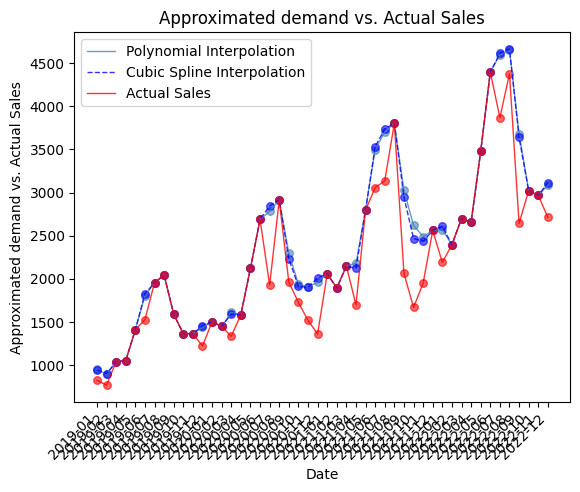

In [74]:
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator

# Plot polynomial interpolation
plt.plot(monthly_summary['Date'], monthly_summary['polynomial_interpolation'], label='Polynomial Interpolation', color='steelblue', linewidth=1, alpha=0.8)
plt.scatter(monthly_summary['Date'], monthly_summary['polynomial_interpolation'], color='steelblue', s=30, alpha=0.6)

# Plot cubic spline interpolation
plt.plot(monthly_summary['Date'], monthly_summary['spline_interpolation'], label='Cubic Spline Interpolation', color='blue', linestyle='--', linewidth=1, alpha=0.8)
plt.scatter(monthly_summary['Date'], monthly_summary['spline_interpolation'], color='blue', s=30, alpha=0.6)

# Plot actual sales
plt.plot(monthly_summary['Date'], monthly_summary['actual_sales'], label='Actual Sales', color='red', linewidth=1, alpha=0.8)
plt.scatter(monthly_summary['Date'], monthly_summary['actual_sales'], color='red', s=30, alpha=0.6)

# Customize legend
plt.legend(loc='upper left')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Approximated demand vs. Actual Sales')
plt.title('Approximated demand vs. Actual Sales')

# Format x-axis
#plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
#plt.gca().xaxis.set_minor_locator(AutoMinorLocator(2))
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')


plt.show()